In [17]:
import torch 
import torchvision 
import torch.utils.data
from torchvision import transforms, datasets


In [18]:
# we should seperate training dataset from test dataset
# MIST has datasets for digits
# MIST("were you wanna save", .., .. , here we specify what transforms to apply)
train = datasets.MNIST("",train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

In [20]:
# batch size is how much data to give it at a time
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [22]:
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [23]:
# data here contains 2 elements 1. tensor of tensors (images), 2. tensor of labels
# we can access the last for loop variable

x,y = data[0][0], data[1][0]

print(y)

tensor(1)


In [27]:
import matplotlib.pyplot as plt

# plt.imshow(data[0][0])
# That doesn't work because of the shape as you can see 

print(data[0][0].shape)

# pay attention to the one at first !!!!!!!!!

torch.Size([1, 28, 28])


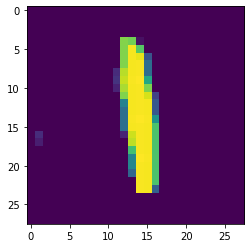

In [29]:
# so instead we do this :
plt.imshow(data[0][0].view(28,28))
plt.show()

In [31]:
# to confirm that this dataset is balanced :

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [33]:
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}") # f is like format here
    
# remember dataset is important and should contain balanced amounts among the samples,
# if it differs a little, it is fine and the optimizor can get around it
# 

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001
